In [91]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [92]:
cannabis = pd.read_csv(r"C:\Users\broga\OneDrive\Desktop\MSBA\Computing_ML\Labs\Lab_8\cannabis_full.csv")
for col in cannabis.columns[5:]:
    cannabis[col] = cannabis[col].astype('category')
cannabis = cannabis.drop(['Strain','Effects','Flavor'],axis=1)
cannabis.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,hybrid,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,hybrid,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hybrid,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hybrid,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part One: Binary Classification

In [93]:
binarydf = cannabis[cannabis["Type"].isin(["sativa","indica"])]
X = binarydf.drop(["Type"],axis=1)
y = binarydf["Type"]

In [94]:
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), 
         make_column_selector(dtype_include=['category', 'object']))      
    ],
    remainder="passthrough"
)


## LDA

In [95]:
#LDA

lda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("LDA", LinearDiscriminantAnalysis())
    ]
)

lda_model = lda_pipeline.fit(X,y)
                             
lda_y_pred = lda_model.predict(X)

lda_matrix = confusion_matrix(y,lda_y_pred)

print("LDA Confusion Matrix:")
print(lda_matrix)

scores_lda = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')
lda_acc = scores_lda.mean()
print(f"LDA Accuracy Score:",lda_acc)

LDA Confusion Matrix:
[[639  60]
 [ 88 352]]
LDA Accuracy Score: 0.8402078986011284


## QDA

In [96]:
#QDA
import warnings
warnings.filterwarnings("ignore", message="Variables are collinear")

qda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("QDA", QuadraticDiscriminantAnalysis())  
    ]
)

qda_model = qda_pipeline.fit(X, y)

qda_y_pred = qda_model.predict(X)

qda_matrix = confusion_matrix(y, qda_y_pred)

print("QDA Confusion Matrix:")
print(qda_matrix)

scores_qda = cross_val_score(qda_model, X, y, cv=5, scoring='accuracy')
svm_qda = scores_qda.mean()
print(f"QDA Accuracy Score:",svm_qda)

QDA Confusion Matrix:
[[302 397]
 [ 63 377]]
QDA Accuracy Score: 0.6585284797897828


## SVC

In [97]:
svc_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("SVC", SVC(kernel='linear'))  
    ]
)

svc_model = svc_pipeline.fit(X, y)

svc_y_pred = svc_model.predict(X)

svc_matrix = confusion_matrix(y, svc_y_pred)
print("SVC Confusion Matrix:")
print(svc_matrix)

scores_svc = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
svc_acc = scores_svc.mean()
print(f"SVC Accuracy Score:", svc_acc)


SVC Confusion Matrix:
[[647  52]
 [ 85 355]]
SVC Accuracy Score: 0.8375879125125589


## SVM

In [98]:
svm_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("SVC", SVC(kernel='poly'))  
    ]
)

svm_model = svm_pipeline.fit(X, y)

svm_y_pred = svm_model.predict(X)

svm_matrix = confusion_matrix(y, svm_y_pred)
print("SVM Confusion Matrix:")
print(svm_matrix)

scores_svm = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
svm_acc = scores_svm.mean()
print(f"SVM Accuracy Score:",svm_acc)

SVM Confusion Matrix:
[[654  45]
 [ 85 355]]
SVM Accuracy Score: 0.8489991498570214


# Part Two: Natural Multiclass

In [99]:
X = cannabis.drop(["Type"],axis=1)
y = cannabis["Type"]

## Decision Tree

In [100]:
#DT Tuning

# Create a Decision Tree pipeline
dt_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier())
])

leaf_values = [100,125,200,250]

leaf_param = {
    'decision_tree__min_samples_leaf': leaf_values
}

gscv = GridSearchCV(dt_pipeline, leaf_param, cv=5, scoring='accuracy')

gscv.fit(X, y)

acc_scores = gscv.cv_results_['mean_test_score']

results_df = pd.DataFrame(data={"min_samples_leaf": leaf_values, "Acc scores": acc_scores})

results_df


,min_samples_leaf,Acc scores
0,100,0.621013
1,125,0.626545
2,200,0.626545
3,250,0.612082


DT Accuracy: 0.6265446989203596


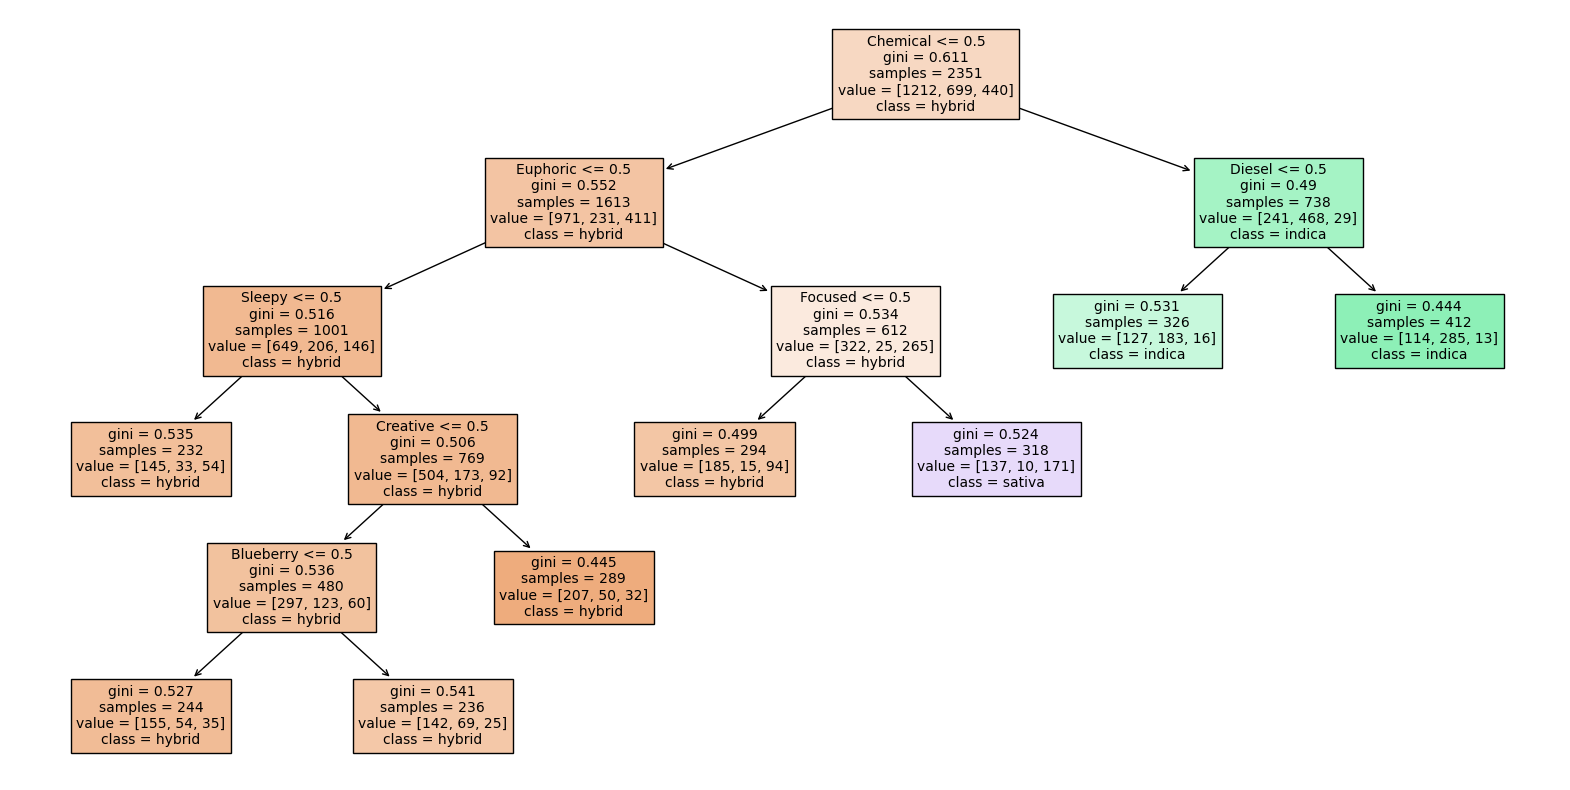

In [101]:
dt_pipeline200 = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(min_samples_leaf=200))
])

dt_model = dt_pipeline200.fit(X, y)

scoresdt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
dt_acc = scoresdt.mean()
print(f"DT Accuracy: {dt_acc}")


decision_tree_model = dt_pipeline200.named_steps['decision_tree']

class_names = decision_tree_model.classes_


plt.figure(figsize=(20, 10))  
plot_tree(decision_tree_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=class_names,
          fontsize=10)
plt.show()


According to the decision tree results, the main variable that distinguishes between hybrid and indica is the chemical quality. Furthermore, the main difference between a hybrid and sativa strain is the focused attribute. We can conclude that most sativa strands offer a more focused effect than the other strains.

## LDA Part Two

In [102]:
#LDA 2

lda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("LDA", LinearDiscriminantAnalysis())
    ]
)

lda_model = lda_pipeline.fit(X,y)
                             
lda_y_pred = lda_model.predict(X)

lda_matrix = confusion_matrix(y,lda_y_pred)

print("LDA 2 Confusion Matrix:")
print(lda_matrix)
scores_lda = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')
lda_acc = scores_lda.mean()
print(f"LDA 2 Accuracy Score:",lda_acc)



LDA 2 Confusion Matrix:
[[851 213 148]
 [215 474  10]
 [230  20 190]]
LDA 2 Accuracy Score: 0.6235659755161043


## QDA Part Two

In [103]:
#QDA 2
warnings.filterwarnings("ignore", message="Variables are collinear")

qda_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("QDA", QuadraticDiscriminantAnalysis())  
    ]
)

qda_model = qda_pipeline.fit(X, y)

qda_y_pred = qda_model.predict(X)

qda_matrix = confusion_matrix(y, qda_y_pred)

print("QDA 2 Confusion Matrix:")
print(qda_matrix)

scores_qda = cross_val_score(qda_model, X, y, cv=5, scoring='accuracy')
svm_qda = scores_qda.mean()
print(f"QDA 2 Accuracy Score:",svm_qda)

QDA 2 Confusion Matrix:
[[162 449 601]
 [ 45 409 245]
 [ 57  77 306]]
QDA 2 Accuracy Score: 0.34708497086326057


## KNN Part Two

In [104]:
#Tune to find optimal k

knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]
)

k_values = [100,150,200,250]  

# Parameter grid for GridSearchCV
k_param = {'knn__n_neighbors': k_values}

gscv = GridSearchCV(knn_pipeline, k_param, cv=5, scoring='accuracy')

#Fit to data
gscv_fitted = gscv.fit(X, y)

knn_acc_scores = gscv_fitted.cv_results_['mean_test_score']

pd.DataFrame(data={"k values": k_values, "KNN acc scores": knn_acc_scores})


,k values,KNN acc scores
0,100,0.608256
1,150,0.608259
2,200,0.610388
3,250,0.604433


In [105]:
#Using optimal k = 200

knn_pipeline200 = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier(n_neighbors=200))]
)

#Fit on data
knn_model = knn_pipeline200.fit(X,y)

#Get Acc score
scoresknn = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

knn_acc = scoresknn.mean()

print(f"KNN Accuracy: {knn_acc}")

knn_ypred = knn_pipeline200.predict(X)

#Confusion matrix
knnconf_matrix = confusion_matrix(y, knn_ypred)

# Print the confusion matrix
print("Confusion Matrix:")
print(knnconf_matrix)

KNN Accuracy: 0.6103880381262141
Confusion Matrix:
[[1025  183    4]
 [ 284  414    1]
 [ 421   12    7]]


## Analysis Part Two

The metrics in Part Two were lower than in Part One, which makes sense intuitively as we are having to predict with multiclass instead of binary. The categories that were most likely to get mixed up were distinguishing between the hybrid and other categories, as hybrid strains contain qualities represented in both sativa and indica strains.

# Part Three: Multiclass from Binary

In [106]:
#Create new columns for OvR
cannabis['IndicaOvR'] = (cannabis['Type'] == "indica").astype(int)
cannabis['IndicaOvR'] = cannabis['IndicaOvR'].astype('category')

cannabis['SativaOvR'] = (cannabis['Type'] == "sativa").astype(int)
cannabis['SativaOvR'] = cannabis['SativaOvR'].astype('category')

cannabis['HybridOvR'] = (cannabis['Type'] == "hybrid").astype(int)
cannabis['HybridOvR'] = cannabis['HybridOvR'].astype('category')

## One vs. Rest

## OvR SVC

In [107]:
X = cannabis.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = cannabis["IndicaOvR"]

svc_model = svc_pipeline.fit(X, y)

svc_y_pred = svc_model.predict(X)

svc_matrix = confusion_matrix(y, svc_y_pred)
print("SVC Indica vs. not Indica Confusion Matrix:")
print(svc_matrix)

scores_svc = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
svc_acc = scores_svc.mean()
print(f"SVC Indica vs. not Indica Accuracy: {svc_acc}")

SVC Indica vs. not Indica Confusion Matrix:
[[1395  257]
 [ 232  467]]
SVC Indica vs. not Indica Accuracy: 0.7856312960202376


In [108]:
X = cannabis.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = cannabis["SativaOvR"]

svc_model = svc_pipeline.fit(X, y)

svc_y_pred = svc_model.predict(X)

svc_matrix = confusion_matrix(y, svc_y_pred)
print("SVC Sativa vs. not Sativa Confusion Matrix:")
print(svc_matrix)

scores_svc = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
svc_acc = scores_svc.mean()
print(f"SVC Sativa vs. not Sativa Accuracy: {svc_acc}")

SVC Sativa vs. not Sativa Confusion Matrix:
[[1907    4]
 [ 435    5]]
SVC Sativa vs. not Sativa Accuracy: 0.8158205718932106


In [109]:
X = cannabis.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = cannabis["HybridOvR"]

svc_model = svc_pipeline.fit(X, y)

svc_y_pred = svc_model.predict(X)

svc_matrix = confusion_matrix(y, svc_y_pred)
print("SVC Hybrid vs. not Hybrid Confusion Matrix:")
print(svc_matrix)

scores_svc = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
svc_acc = scores_svc.mean()
print(f"SVC Hybrid vs. not Hybrid Accuracy: {svc_acc}")

SVC Hybrid vs. not Hybrid Confusion Matrix:
[[537 602]
 [261 951]]
SVC Hybrid vs. not Hybrid Accuracy: 0.6146279983737635


## Logistic OvR

In [110]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=['category', 'object'])), 
    ("standardize", StandardScaler(),make_column_selector(dtype_include=np.number)) 
  ],
  remainder = "passthrough"
)

In [111]:
X = cannabis.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = cannabis["IndicaOvR"]

# Logistic regression pipeline
log_pipeline = Pipeline([
    ("preprocessing", ct),
    ("logistic_regression", LogisticRegression(max_iter=1000))]
    )

# Fit on training data
log_model = log_pipeline.fit(X,y)

log_y_pred = log_model.predict(X)

log_matrix = confusion_matrix(y, log_y_pred)
print("Log Indica vs. not Indica Confusion Matrix:")
print(log_matrix)

scores_log = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
log_acc = scores_log.mean()
print(f"Log Indica vs. not Indica Accuracy: {log_acc}")


Log Indica vs. not Indica Confusion Matrix:
[[1465  187]
 [ 263  436]]
Log Indica vs. not Indica Accuracy: 0.7903094366897051


In [112]:
X = cannabis.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = cannabis["SativaOvR"]

# Fit on training data
log_model = log_pipeline.fit(X,y)

log_y_pred = log_model.predict(X)

log_matrix = confusion_matrix(y, log_y_pred)
print("Log Sativa vs. not Sativa Confusion Matrix:")
print(log_matrix)

scores_log = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
log_acc = scores_log.mean()
print(f"Log Sativa vs. not Sativa Accuracy: {log_acc}")


Log Sativa vs. not Sativa Confusion Matrix:
[[1819   92]
 [ 299  141]]
Log Sativa vs. not Sativa Accuracy: 0.8277309481862944


In [113]:
X = cannabis.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = cannabis["HybridOvR"]

# Fit on training data
log_model = log_pipeline.fit(X,y)

log_y_pred = log_model.predict(X)

log_matrix = confusion_matrix(y, log_y_pred)
print("Log Hybrid vs. not Hybrid Confusion Matrix:")
print(log_matrix)

scores_log = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
log_acc = scores_log.mean()
print(f"Log Hybrid vs. not Hybrid Accuracy: {log_acc}")


Log Hybrid vs. not Hybrid Confusion Matrix:
[[665 474]
 [354 858]]
Log Hybrid vs. not Hybrid Accuracy: 0.6116574061525952


## Logistic and SVC OvR Analysis

Both sativa models performed the best, with the logistic sativa model performing the best with an accuracy score of 0.8277. Both hybrid models were the worst at dinstinguishing the target category, which makes sense intuitively as a hybrid would be a mixture of both types and therefore would share similar qualities to both sativa and indica strains. These similarities ultimately make it harder to identify hybrid strains.

## One vs. One

In [114]:
IndSat = cannabis[cannabis['Type'].isin(["indica","sativa"])]  
IndHyb = cannabis[cannabis['Type'].isin(["indica","hybrid"])] 
HybSat = cannabis[cannabis['Type'].isin(["hybrid","sativa"])] 

## SVC OvO

In [115]:
X = IndSat.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = IndSat["Type"]

svc_model = svc_pipeline.fit(X, y)

svc_y_pred = svc_model.predict(X)

svc_matrix = confusion_matrix(y, svc_y_pred)
print("SVC Indica vs. Sativa Confusion Matrix:")
print(svc_matrix)

scores_svc = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
svc_acc = scores_svc.mean()
print(f"SVC Indica vs. Sativa Accuracy: {svc_acc}")

SVC Indica vs. Sativa Confusion Matrix:
[[647  52]
 [ 85 355]]
SVC Indica vs. Sativa Accuracy: 0.8375879125125589


In [116]:
X = IndHyb.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = IndHyb["Type"]

svc_model = svc_pipeline.fit(X, y)

svc_y_pred = svc_model.predict(X)

svc_matrix = confusion_matrix(y, svc_y_pred)
print("SVC Indica vs. Hybrid Confusion Matrix:")
print(svc_matrix)

scores_svc = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
svc_acc = scores_svc.mean()
print(f"SVC Indica vs. Hybrid Accuracy: {svc_acc}")

SVC Indica vs. Hybrid Confusion Matrix:
[[981 231]
 [230 469]]
SVC Indica vs. Hybrid Accuracy: 0.752491353738056


In [117]:
X = HybSat.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = HybSat["Type"]

svc_model = svc_pipeline.fit(X, y)

svc_y_pred = svc_model.predict(X)

svc_matrix = confusion_matrix(y, svc_y_pred)
print("SVC Sativa vs. Hybrid Confusion Matrix:")
print(svc_matrix)

scores_svc = cross_val_score(svc_model, X, y, cv=5, scoring='accuracy')
svc_acc = scores_svc.mean()
print(f"SVC Sativa vs. Hybrid Accuracy: {svc_acc}")

SVC Sativa vs. Hybrid Confusion Matrix:
[[1145   67]
 [ 310  130]]
SVC Sativa vs. Hybrid Accuracy: 0.7396850682047057


## Logistic OvO

In [118]:
X = IndSat.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = IndSat["Type"]

log_model = log_pipeline.fit(X,y)

log_y_pred = log_model.predict(X)

log_matrix = confusion_matrix(y, log_y_pred)
print("Log Indica vs. Sativa Confusion Matrix:")
print(log_matrix)

scores_log = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
log_acc = scores_log.mean()
print(f"Log Indica vs. Sativa Accuracy: {log_acc}")


Log Indica vs. Sativa Confusion Matrix:
[[630  69]
 [ 81 359]]
Log Indica vs. Sativa Accuracy: 0.8402117628873947


In [119]:
X = IndHyb.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = IndHyb["Type"]

log_model = log_pipeline.fit(X,y)

log_y_pred = log_model.predict(X)

log_matrix = confusion_matrix(y, log_y_pred)
print("Log Indica vs. Hybrid Confusion Matrix:")
print(log_matrix)

scores_log = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
log_acc = scores_log.mean()
print(f"Log Indica vs. Hybrid Accuracy: {log_acc}")


Log Indica vs. Hybrid Confusion Matrix:
[[1020  192]
 [ 244  455]]
Log Indica vs. Hybrid Accuracy: 0.7472571186417508


In [120]:
X = HybSat.drop(["Type",'IndicaOvR','SativaOvR','HybridOvR'],axis=1)
y = HybSat["Type"]

log_model = log_pipeline.fit(X,y)

log_y_pred = log_model.predict(X)

log_matrix = confusion_matrix(y, log_y_pred)
print("Log Sativa vs. Hybrid Confusion Matrix:")
print(log_matrix)

scores_log = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')
log_acc = scores_log.mean()
print(f"Log Sativa vs. Hybrid Accuracy: {log_acc}")


Log Sativa vs. Hybrid Confusion Matrix:
[[1119   93]
 [ 289  151]]
Log Sativa vs. Hybrid Accuracy: 0.7451469376544905


## OvO SVC and Logistic Analysis

Once again we are left with intuitive results as the Sativa vs. Indica models performed the best, with the logistic model having the highest accuracy score (0.84). As previously mentioned, the Sativa and Indica models do the best at distinguishing between the groups as they are distinct strains of cannabis, whereas hybrid contains qualities of both strains and therefore makes it harder to classify.

# Q5: Logisitic vs SVC Approach

Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

According to sklearn's documentation, the LogisticRegression function would have automatically taken the "OvR" approach, and the SVC function would have taken the "OvO" approach.